In [1]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio


import pyreadstat

In [2]:
df_2018 = pd.read_csv('/Users/syshin/Desktop/Himedia/Himedia_project/문화체육관광부/2018 국내여행/2018_전처리 최종 .csv', encoding='utf-8', index_col=0)
df_2018

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2018.0,34360,1,0,0,33.0,0.0,57200.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,31350,1,0,0,5.0,0.0,90000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.0,36360,1,1,1,5.0,0.0,42003.514938,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,31370,1,0,0,2.0,0.0,50000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,32340,1,1,1,5.0,0.0,198000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,2018.0,21090,1,2,"1,3",2.0,0.0,263111.111111,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8930,2018.0,36010,1,2,"1,3",3.0,1.0,140945.674044,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8931,2018.0,39010,1,1,11,3.0,1.0,45283.018868,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8932,2018.0,39010,1,0,0,5.0,0.0,30000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_2019 = pd.read_csv('./2019 국내여행/2019_split버전.csv', encoding='utf-8', index_col=0)
df_2019

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2019.0,36460,1,2,2,12.0,0.0,250000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,21090,1,2,9,6.0,0.0,217000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,31370,1,2,3,3.0,1.0,348000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,36360,1,2,1,3.0,0.0,43000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,25040,1,0,0,3.0,0.0,200000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18140,2019.0,11030,1,1,1,20.0,0.0,300000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18141,2019.0,"39010,11230,39010,39010",4,"3,2,2,3",1,5.0,0.0,212000.0,NaN,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
18143,2019.0,39010,1,0,0,2.0,0.0,100000.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18144,2019.0,11210,1,2,1,12.0,0.0,300000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_2020 = pd.read_csv('./2020 국내여행/2020_split버전.csv', encoding='utf-8', index_col=0)
df_2020

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2020.0,"23310,23310",2,1,3,2.0,0.0,439000.0,219500.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,31160,1,0,0,4.0,0.0,70002.0,23334.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,31110,1,0,0,3.0,0.0,74500.0,26500.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,"23080,31270",2,"0,0",NaN,2.0,0.0,100000.0,50000.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.0,"32400,32390",2,1,11,4.0,0.0,400000.0,100000.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939,2020.0,"39010,39010",2,"0,0",NaN,3.0,0.0,40000.0,40000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11940,2020.0,39010,1,0,0,1.0,NaN,10000.0,10000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11941,2020.0,"39010,39010",2,1,3,12.0,6.0,260008.0,23334.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11942,2020.0,"39010,39010",2,"0,0",NaN,7.0,3.0,190007.0,28751.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.concat([df_2018, df_2019, df_2020])
df

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2018.0,34360,1,0,0,33.0,0.0,57200.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,31350,1,0,0,5.0,0.0,90000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.0,36360,1,1,1,5.0,0.0,42003.514938,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,31370,1,0,0,2.0,0.0,50000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,32340,1,1,1,5.0,0.0,198000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939,2020.0,"39010,39010",2,"0,0",NaN,3.0,0.0,40000.000000,40000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11940,2020.0,39010,1,0,0,1.0,NaN,10000.000000,10000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11941,2020.0,"39010,39010",2,1,3,12.0,6.0,260008.000000,23334.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11942,2020.0,"39010,39010",2,"0,0",NaN,7.0,3.0,190007.000000,28751.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
df

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2018.0,34360,1,0,0,33.0,0.0,57200.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,31350,1,0,0,5.0,0.0,90000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.0,36360,1,1,1,5.0,0.0,42003.514938,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,31370,1,0,0,2.0,0.0,50000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,32340,1,1,1,5.0,0.0,198000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37714,2020.0,"39010,39010",2,"0,0",NaN,3.0,0.0,40000.000000,40000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37715,2020.0,39010,1,0,0,1.0,NaN,10000.000000,10000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37716,2020.0,"39010,39010",2,1,3,12.0,6.0,260008.000000,23334.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37717,2020.0,"39010,39010",2,"0,0",NaN,7.0,3.0,190007.000000,28751.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.loc[0,'sleepnights']

'0'

In [9]:
for index in df.index:
  target_list_index = df.loc[index,'sleepnights'].split(',')
  for i, targets in enumerate(target_list_index):
       t_col = 'sleepnights_'+str(i+1)
       df.loc[index,t_col]= targets

In [10]:
df.columns

Index(['year', 'target_area', 'no_of_place', 'sleepnights', 'accommodation',
       'number_of_ppl', 'number_of_children', 'cost_total_trip',
       'cost_total_per_person', 'satisfied', 'sex', 'age', 'month',
       'living_area', 'target_beforesplit', 'transportation', 'reason',
       'relationship_beforesplit', 'relationship1', 'relationship2',
       'relationship3', 'target_1', 'target_2', 'target_3', 'target_4',
       'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
       'target_11', 'target_12', 'target_14', 'target_15', 'target_16',
       'target_17', 'target_area1', 'target_area2', 'target_area3',
       'target_area4', 'target_area5', 'target_area6', 'target_area7',
       'target_area8', 'target_area9', 'target_area10', 'target_area11',
       'transportation1', 'transportation2', 'transportation3', 'reason1',
       'reason2', 'reason3', 'accommodation_1', 'accommodation_2',
       'accommodation_3', 'accommodation_4', 'accommodation_5',
       

In [11]:
df = df[[
    'year',
    'target_area1', 
    'target_area2', 'target_area3', 'target_area4', 'target_area5', 'target_area6', 'target_area7',
    'target_area8', 'target_area9', 'target_area10', 'target_area11',
    'no_of_place',
    'sleepnights_1', 'sleepnights_2', 'sleepnights_3', 'sleepnights_4',
       'sleepnights_5', 'sleepnights_6', 'sleepnights_7', 'sleepnights_8', 
    'accommodation_1', 'accommodation_2','accommodation_3',
    'number_of_ppl', 
    'number_of_children', 
    'cost_total_trip',
    'satisfied', 
    'sex', 
    'age', 
    'month', 
    'living_area',
    'transportation1', 'transportation2', 'transportation3',
    'reason1', 'reason2', 'reason3',
    'target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17',
    'relationship1', 'relationship2', 'relationship3'
]]

In [12]:
df

,year,target_area1,target_area2,target_area3,target_area4,target_area5,target_area6,target_area7,target_area8,target_area9,...,target_10,target_11,target_12,target_14,target_15,target_16,target_17,relationship1,relationship2,relationship3
0,2018.0,34360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,2018.0,31350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,2018.0,36360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3,2018.0,31370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN
4,2018.0,32340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37714,2020.0,39010,39010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
37715,2020.0,39010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37716,2020.0,39010,39010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
37717,2020.0,39010,39010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [13]:
df = df[df.loc[:,['target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17']].sum(axis=1)==1]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 18 to 37716
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5155 non-null   float64
 1   target_area1        5157 non-null   int64  
 2   target_area2        536 non-null    float64
 3   target_area3        75 non-null     float64
 4   target_area4        18 non-null     float64
 5   target_area5        6 non-null      float64
 6   target_area6        2 non-null      float64
 7   target_area7        2 non-null      float64
 8   target_area8        1 non-null      float64
 9   target_area9        0 non-null      float64
 10  target_area10       0 non-null      float64
 11  target_area11       0 non-null      float64
 12  no_of_place         5157 non-null   int64  
 13  sleepnights_1       5157 non-null   object 
 14  sleepnights_2       345 non-null    object 
 15  sleepnights_3       41 non-null     object 
 16  slee

In [15]:
df = df[[
    'year',
    'target_area1', 
    'target_area2', 'target_area3', 'target_area4', 'target_area5', 'target_area6', 'target_area7',
    'target_area8', 'target_area9', 'target_area10', 'target_area11',
    'no_of_place',
    'sleepnights_1', 
    'sleepnights_2', 'sleepnights_3', 'sleepnights_4','sleepnights_5', 'sleepnights_6', 'sleepnights_7', 'sleepnights_8', 
    'accommodation_1', 'accommodation_2','accommodation_3',
    'number_of_ppl', 
    'number_of_children', 
    'cost_total_trip',
    'satisfied', 
    'sex', 
    'age', 
    'month', 
    'living_area',
    'transportation1', 'transportation2', 'transportation3',
    'reason1', 'reason2', 'reason3',
    'target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17',
    'relationship1', 'relationship2', 'relationship3'
]]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 18 to 37716
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5155 non-null   float64
 1   target_area1        5157 non-null   int64  
 2   target_area2        536 non-null    float64
 3   target_area3        75 non-null     float64
 4   target_area4        18 non-null     float64
 5   target_area5        6 non-null      float64
 6   target_area6        2 non-null      float64
 7   target_area7        2 non-null      float64
 8   target_area8        1 non-null      float64
 9   target_area9        0 non-null      float64
 10  target_area10       0 non-null      float64
 11  target_area11       0 non-null      float64
 12  no_of_place         5157 non-null   int64  
 13  sleepnights_1       5157 non-null   object 
 14  sleepnights_2       345 non-null    object 
 15  sleepnights_3       41 non-null     object 
 16  slee

In [17]:
df = df.fillna(0)

In [18]:
cols = df.columns

In [19]:
df = df.astype('int64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 18 to 37716
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                5157 non-null   int64
 1   target_area1        5157 non-null   int64
 2   target_area2        5157 non-null   int64
 3   target_area3        5157 non-null   int64
 4   target_area4        5157 non-null   int64
 5   target_area5        5157 non-null   int64
 6   target_area6        5157 non-null   int64
 7   target_area7        5157 non-null   int64
 8   target_area8        5157 non-null   int64
 9   target_area9        5157 non-null   int64
 10  target_area10       5157 non-null   int64
 11  target_area11       5157 non-null   int64
 12  no_of_place         5157 non-null   int64
 13  sleepnights_1       5157 non-null   int64
 14  sleepnights_2       5157 non-null   int64
 15  sleepnights_3       5157 non-null   int64
 16  sleepnights_4       5157 non-null   int6

In [21]:
df[df['target_1'] + df['target_2'] + df['target_3'] + df['target_4'] + df['target_5'] + df['target_6'] + df['target_7']
   + df['target_8']+ df['target_9']+ df['target_10']+ df['target_11']+ df['target_12']+ df['target_14'] + df['target_15']
   + df['target_16']+ df['target_17']==2]

,year,target_area1,target_area2,target_area3,target_area4,target_area5,target_area6,target_area7,target_area8,target_area9,...,target_10,target_11,target_12,target_14,target_15,target_16,target_17,relationship1,relationship2,relationship3


In [22]:
df1=df[df.loc[:,['target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17']].sum(axis=1)==1]
df1[['target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17']]

,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,target_11,target_12,target_14,target_15,target_16,target_17
18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
37712,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
37713,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
37715,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
for index in df1.index:
    if df1.loc[index, ['target_1', 'target_6', 'target_7']].sum()==1:
        df1.loc[index, 'target']='힐링,호캉스'
    elif df1.loc[index,['target_3', 'target_5', 'target_8', 'target_12', 'target_17']].sum()==1:
        df1.loc[index, 'target']='엑티비티'
    elif df1.loc[index, ['target_2']].sum()==1:
        df1.loc[index, 'target']='식도락,맛집투어'
    else:
        df1.loc[index, 'target']='축제,관광'

In [24]:
df1.reset_index(inplace=True, drop=True)

In [25]:
df1['target'].value_counts()

힐링,호캉스      3397
엑티비티         850
식도락,맛집투어     584
축제,관광        326
Name: target, dtype: int64

In [26]:
df1

,year,target_area1,target_area2,target_area3,target_area4,target_area5,target_area6,target_area7,target_area8,target_area9,...,target_11,target_12,target_14,target_15,target_16,target_17,relationship1,relationship2,relationship3,target
0,2018,99999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"힐링,호캉스"
1,2018,32390,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"힐링,호캉스"
2,2018,31370,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,0,0,엑티비티
3,2018,31370,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"힐링,호캉스"
4,2018,99999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"힐링,호캉스"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,2020,39020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,엑티비티
5153,2020,39010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,엑티비티
5154,2020,21070,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,엑티비티
5155,2020,39010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"힐링,호캉스"


In [27]:
df1['target']=df1['target'].astype('category')

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   year                5157 non-null   int64   
 1   target_area1        5157 non-null   int64   
 2   target_area2        5157 non-null   int64   
 3   target_area3        5157 non-null   int64   
 4   target_area4        5157 non-null   int64   
 5   target_area5        5157 non-null   int64   
 6   target_area6        5157 non-null   int64   
 7   target_area7        5157 non-null   int64   
 8   target_area8        5157 non-null   int64   
 9   target_area9        5157 non-null   int64   
 10  target_area10       5157 non-null   int64   
 11  target_area11       5157 non-null   int64   
 12  no_of_place         5157 non-null   int64   
 13  sleepnights_1       5157 non-null   int64   
 14  sleepnights_2       5157 non-null   int64   
 15  sleepnights_3       5157 non-null   in

In [29]:
df1.drop(columns=['target_1',
       'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7',
       'target_8', 'target_9', 'target_10', 'target_11', 'target_12',
       'target_14', 'target_15', 'target_16', 'target_17'], inplace=True)

In [30]:
category_list = ['accommodation_1', 'accommodation_2', 'accommodation_3',
       'transportation1', 'transportation2',
       'transportation3', 'reason1', 'reason2', 'reason3', 'relationship1',
       'relationship2', 'relationship3', 'sex', 'year', 'target_area1','target_area2', 'target_area3',
       'target_area4', 'target_area5', 'target_area6', 'target_area7',
       'target_area8', 'target_area9', 'target_area10', 'target_area11', 'month', 'living_area']

In [31]:
df1[category_list] = df1[category_list].astype('category')

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   year                5157 non-null   category
 1   target_area1        5157 non-null   category
 2   target_area2        5157 non-null   category
 3   target_area3        5157 non-null   category
 4   target_area4        5157 non-null   category
 5   target_area5        5157 non-null   category
 6   target_area6        5157 non-null   category
 7   target_area7        5157 non-null   category
 8   target_area8        5157 non-null   category
 9   target_area9        5157 non-null   category
 10  target_area10       5157 non-null   category
 11  target_area11       5157 non-null   category
 12  no_of_place         5157 non-null   int64   
 13  sleepnights_1       5157 non-null   int64   
 14  sleepnights_2       5157 non-null   int64   
 15  sleepnights_3       5157 non-null   in

In [33]:
df_data = pd.get_dummies(df1.iloc[:,:-1])

In [34]:
df_target = df1.iloc[:,-1:]

In [35]:
df_data.columns

Index(['no_of_place', 'sleepnights_1', 'sleepnights_2', 'sleepnights_3',
       'sleepnights_4', 'sleepnights_5', 'sleepnights_6', 'sleepnights_7',
       'sleepnights_8', 'number_of_ppl',
       ...
       'relationship1_5', 'relationship1_6', 'relationship1_7',
       'relationship2_0', 'relationship2_2', 'relationship2_3',
       'relationship2_4', 'relationship2_5', 'relationship2_7',
       'relationship3_0'],
      dtype='object', length=681)

In [36]:
df1 = pd.concat([df_data, df_target], axis=1)

In [37]:
df1

,no_of_place,sleepnights_1,sleepnights_2,sleepnights_3,sleepnights_4,sleepnights_5,sleepnights_6,sleepnights_7,sleepnights_8,number_of_ppl,...,relationship1_6,relationship1_7,relationship2_0,relationship2_2,relationship2_3,relationship2_4,relationship2_5,relationship2_7,relationship3_0,target
0,1,2,0,0,0,0,0,0,0,3,...,0,0,1,0,0,0,0,0,1,"힐링,호캉스"
1,1,2,0,0,0,0,0,0,0,3,...,0,0,1,0,0,0,0,0,1,"힐링,호캉스"
2,1,1,0,0,0,0,0,0,0,6,...,0,0,1,0,0,0,0,0,1,엑티비티
3,1,0,0,0,0,0,0,0,0,3,...,0,0,1,0,0,0,0,0,1,"힐링,호캉스"
4,1,2,0,0,0,0,0,0,0,4,...,0,0,1,0,0,0,0,0,1,"힐링,호캉스"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,1,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,0,1,엑티비티
5153,1,0,0,0,0,0,0,0,0,4,...,0,0,1,0,0,0,0,0,1,엑티비티
5154,1,2,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,엑티비티
5155,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,"힐링,호캉스"


In [38]:
data = df_data.columns
target = 'target'

In [39]:
df1.to_csv("국내여행_병합.csv")

In [40]:
X_train,X_test,y_train,y_test=train_test_split(
    df1.iloc[:,:-1],
    df1.iloc[:,-1:],
    random_state=42,
    test_size=0.2)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [42]:
dtree = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=8, 
    max_features=24,
    random_state=42)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(
    C=1, 
    gamma='scale',
    probability=True,
    random_state=35
).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [43]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.6598837209302325
knn   :  0.6608527131782945
svm   :  0.6618217054263565


In [44]:
dtree_proba = dtree.predict_proba(X_test)
print(dtree_proba[0:2])

[[0.12306531 0.1204228  0.05813515 0.69837675]
 [0.12306531 0.1204228  0.05813515 0.69837675]]


In [45]:
knn_proba = knn.predict_proba(X_test)
print(knn_proba[0:2])


[[0.11036789 0.2006689  0.08361204 0.60535117]
 [0.13377926 0.12374582 0.09698997 0.64548495]]


In [46]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[0.12458717 0.1662548  0.06475494 0.64440309]
 [0.12059255 0.16495832 0.0643897  0.65005943]]


In [47]:
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree), 
        ('knn', knn), 
        ('svm', svm)], 
    weights=[1,1,1], 
    voting='hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
hard_vote = accuracy_score(y_test, hard_voting_predicted)

In [48]:
hard_vote

0.6608527131782945

In [49]:
voting_clf2 = VotingClassifier(
    estimators=[
        ('decision_tree', dtree), 
        ('knn', knn), 
        ('svm', svm)], 
    weights=[1,1,1], 
    voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf2.predict(X_test)
soft_vote = accuracy_score(y_test, soft_voting_predicted)

In [50]:
soft_vote

0.6608527131782945

In [51]:
xlist = ['knn', 'svm', 'dtree', 'hard', 'soft']
ylist = [accuracy_score(y_test, knn_predicted), accuracy_score(y_test, svm_predicted), accuracy_score(y_test, dtree_predicted), hard_vote, soft_vote]

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


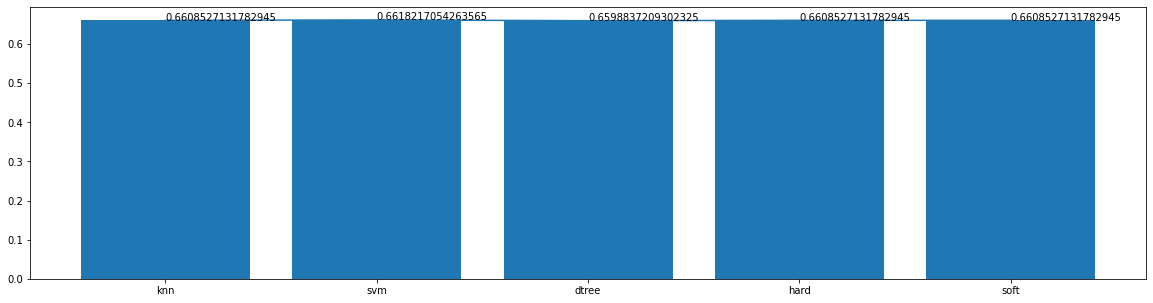

In [52]:
plt.figure(figsize=(20,5))
plt.bar(xlist,ylist)
plt.plot(xlist,ylist)
for a,b in zip(xlist, ylist): 
    plt.text(a, b, str(b))
plt.show()

In [53]:
importance = dtree.feature_importances_

In [54]:
model_list = []
LR = LogisticRegression()
NB = GaussianNB()
RF = RandomForestClassifier()
SVC = SVC()
Dtree = DecisionTreeClassifier()
XGB = XGBClassifier()
KNN = KNeighborsClassifier()
model_list.append(("LR",LR))
model_list.append(("NB",NB))
model_list.append(("RF",RF))
model_list.append(("SVC",SVC))
model_list.append(("Dtree",Dtree))
model_list.append(("XGB",XGB))
model_list.append(("KNN",KNN))
model_list

[('LR', LogisticRegression()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier()),
 ('SVC', SVC()),
 ('Dtree', DecisionTreeClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, gamma=None,
                gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, predictor=None, random_state=None,
                reg_alpha=None, reg_lambda=None, ...)),
 ('KNN', KNeighborsClassifier())]

In [55]:
def print_cv(model, X_train, y_train, k):
    scores = cross_val_score(model, X_train, y_train, cv = k)
    print(i, k, '----교차검증시작----')
    print('결과:', scores)
    mean_scores = np.mean(scores)
    print('평균:', mean_scores)
    return scores, mean_scores 
# 함수의 결과로 여러개의 데이터를 return
# 튜플로 묶어서 반환하게 된다.(scores, mean_scores)

In [56]:
k_number=[5, 10]
sc_list = []
mean_sc_list = []
for i, model in model_list:
    for k in k_number:
        sc, mean_sc = print_cv(model, X_train, y_train, k)
        sc_list.append(sc)
        mean_sc_list.append(mean_sc)
    print()
print('**********************************************************************************************************************')
print()
print()
print('모델명:', model_list,'k:', k_number)
print()
print()
print('전체 모델의 교차 검증 결과 리스트:')
print(sc_list)
print('전체 모델의 교차 검증 결과 평균:')
print(mean_sc_list)
print()
# 최대 평균값 ==
mean_sc_list_nan = []
for i in mean_sc_list:
    if np.isnan(i):
        pass
    else:
        mean_sc_list_nan.append(i)
max_value = np.max(mean_sc_list_nan)
# 최대 평균값 인덱스 ==


max_index = np.nanargmax(mean_sc_list)
# 최대 평균값 모델명 ==
max_model = model_list[max_index//2][0]
if max_index%2 ==0:
    k_max = 5
else:
    k_max = 10

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model, 'k =', k_max)



LR 5 ----교차검증시작----
결과: [0.65818182 0.65818182 0.65818182 0.65818182 0.65818182]
평균: 0.6581818181818182
LR 10 ----교차검증시작----
결과: [0.65859564 0.65859564 0.65859564 0.65859564 0.65859564 0.65776699
 0.65776699 0.65776699 0.65776699 0.65776699]
평균: 0.6581813159688756

NB 5 ----교차검증시작----
결과: [0.65818182 0.65818182 0.65333333 0.65818182 0.65818182]
평균: 0.6572121212121212
NB 10 ----교차검증시작----
결과: [0.65859564 0.65859564 0.65859564 0.65859564 0.6464891  0.65776699
 0.65776699 0.65776699 0.65776699 0.65776699]
평균: 0.656970662215849

RF 5 ----교차검증시작----
결과: [0.73212121 0.74545455 0.71272727 0.71757576 0.72      ]
평균: 0.7255757575757575
RF 10 ----교차검증시작----
결과: [0.71912833 0.73849879 0.75302663 0.73607748 0.73849879 0.70873786
 0.74757282 0.71601942 0.68932039 0.74029126]
평균: 0.7287171771785891

SVC 5 ----교차검증시작----
결과: [0.65818182 0.65818182 0.65818182 0.6569697  0.65818182]
평균: 0.657939393939394
SVC 10 ----교차검증시작----
결과: [0.65859564 0.65859564 0.65859564 0.65859564 0.65859564 0.65776699
 0.655

In [57]:
def grid_search(model, params, k):
    gs_model = GridSearchCV(model, params, cv=k)
    ## gs_model는 최적의 파라메터가 적요된 모델의 객체!
    gs_model.fit(X_train, y_train)
    print('best_estimator:',gs_model.best_estimator_) ##최적의 파라메터가 적용된 모델 객체
    print('best_score:',gs_model.best_score_) ##최적의 파라메터가 적용된 모델로 학습한 정확도 결과(acc)
    print('best_params:',gs_model.best_params_) ##최적의 파라메터
    print('gs_model:',gs_model) #grid_search 객체
    return gs_model.best_estimator_

In [58]:
params = { #하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4*3*2: 24
    'max_depth':[3, 5, 7, 10], #key:하이퍼파라메터명, values는 list
    'random_state': [1,3,5],
    'criterion': ['gini','entropy'] #혼란스러운 정도(분류의 정도)를 계산하는 기준
}
best_model = []

for i, model in model_list:
    try:
        print('----clf model:', model, '----')
        best_model.append(grid_search(model, params, 10))
        print()
    except Exception as e:
        print(e)
        print()
print('=====================best_model:', best_model)

----clf model: LogisticRegression() ----
Invalid parameter 'criterion' for estimator LogisticRegression(). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

----clf model: GaussianNB() ----
Invalid parameter 'criterion' for estimator GaussianNB(). Valid parameters are: ['priors', 'var_smoothing'].

----clf model: RandomForestClassifier() ----
best_estimator: RandomForestClassifier(max_depth=10, random_state=1)
best_score: 0.680970991325607
best_params: {'criterion': 'gini', 'max_depth': 10, 'random_state': 1}
gs_model: GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})

----clf model: SVC() ----
Invalid parameter 'criterion' for estimator SVC(). Valid parameters

In [59]:
## 최적의 하이퍼 파라메터로 모델 객체 생성
## fit()
# dt_gs = DecisionTreeClassifier(criterion = 'gini', max_depth=10, random_state=3)
# dt_gs.fit(X_train, y_train)
# rf_gs = RandomForestClassifier(criterion = 'entropy', max_depth=10, random_state=3)
# rf_gs.fit(X_train, y_train)
xgb_gs = XGBClassifier()

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=3)

In [60]:
for i , model in model_list:
    print(i)
    print(model)

LR
LogisticRegression()
NB
GaussianNB()
RF
RandomForestClassifier()
SVC
SVC()
Dtree
DecisionTreeClassifier()
XGB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
KNN
KNeighborsClassifier()


In [61]:
## 테스트 데이터로 검증해보자!
def test_validation(model, X_test, y_test):
    predict_result = model.predict(X_test)
    acc = accuracy_score(y_test, predict_result)
    print("accuracy:", acc)
    cf = confusion_matrix(y_test, predict_result)
    ##실제(c) --> 예측(c, sg), 실제(sg)==> 예측(sg,c),
    # 이진분류(binary classification)인 경우에는
    # 예측할 수 있는 경우의 수는 4가지!
    # 4가지를 표형태로 정리해주는 것이 confusion matrix!
    # 첫반째 행/열은 c, 두번째 행/열은 sg, abc순으로 행/열이 결정
    print('confusion_matrix:\n', cf)
    ## confusion matrix는 binary classfication 인 경우에는 보기가 괜찮으나, 
    ## multi class classification인 경우에는 보기가 힘들어서
    ## classification_report 를 사용하는게 보기 편하다
    c_report = classification_report(y_test, predict_result)
    print('classification_report:\n', c_report)

test_validation(rf_gs, X_test, y_test)

accuracy: 0.6753875968992248
confusion_matrix:
 [[  0   0   0 125]
 [  0  15   0 148]
 [  0   1   0  61]
 [  0   0   0 682]]
classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.94      0.09      0.17       163
           2       0.00      0.00      0.00        62
           3       0.67      1.00      0.80       682

    accuracy                           0.68      1032
   macro avg       0.40      0.27      0.24      1032
weighted avg       0.59      0.68      0.56      1032



In [62]:
test_validation(rf_gs, X_test, y_test)

accuracy: 0.6753875968992248
confusion_matrix:
 [[  0   0   0 125]
 [  0  15   0 148]
 [  0   1   0  61]
 [  0   0   0 682]]
classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.94      0.09      0.17       163
           2       0.00      0.00      0.00        62
           3       0.67      1.00      0.80       682

    accuracy                           0.68      1032
   macro avg       0.40      0.27      0.24      1032
weighted avg       0.59      0.68      0.56      1032



In [63]:
dt_gs.feature_importances_

array([0.        , 0.01363431, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00561701,
       0.        , 0.04198485, 0.01134006, 0.03905493, 0.        ,
       0.0155109 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00276566, 0.        ,
       0.        , 0.        , 0.        , 0.06898151, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00165222,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00157354, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02005682,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00260

<BarContainer object of 681 artists>

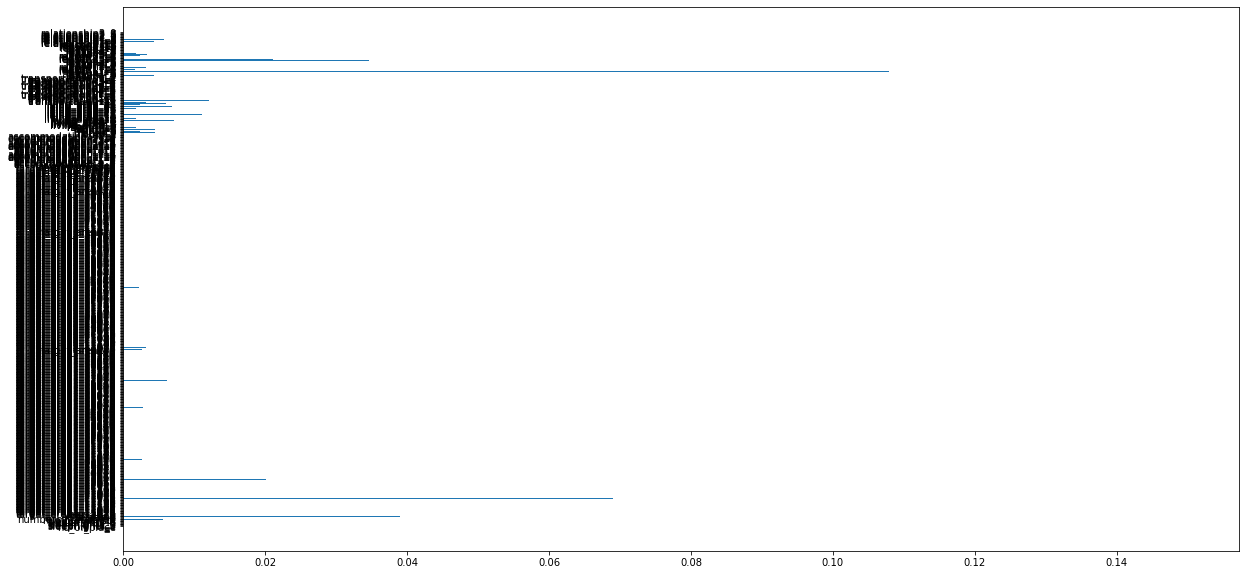

In [64]:
plt.figure(figsize=(20,10))
plt.barh(data, dt_gs.feature_importances_)

In [65]:
df1[['transportation1', 'transportation2', 'transportation3']].head(60)

KeyError: "None of [Index(['transportation1', 'transportation2', 'transportation3'], dtype='object')] are in the [columns]"

In [ ]:
df1['transportation1'].value_counts()

In [ ]:
df1['transportation2'].value_counts()

In [ ]:
df1['transportation3'].value_counts()

In [ ]:
df1['reason1'].value_counts()

In [ ]:
df1['reason2'].value_counts()

In [ ]:
df1['reason3'].value_counts()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
type(X_train)

In [ ]:
data = df1[data]
target = df1[target]

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

In [ ]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행하세요.
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

In [ ]:
hgb.score(test_input, test_target)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='auto', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
scores

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
df1.isnull().values.any()